
# Icebergs (openberg)


In [1]:
from opendrift.models.openberg import OpenBerg
from datetime import datetime,timedelta, timezone

In [2]:
o = OpenBerg(loglevel=20)

23:55:40 INFO    opendrift.models.basemodel:515: OpenDriftSimulation initialised (version 1.11.13)


In [3]:
# The user can overwrite the default setup using set_config method
o.set_config('drift:vertical_profile', False) # use surface currents for this test

o.add_readers_from_list([
        'https://thredds.met.no/thredds/dodsC/cmems/topaz6/dataset-topaz6-arc-15min-3km-be.ncml',
        'https://pae-paha.pacioos.hawaii.edu/thredds/dodsC/ncep_global/NCEP_Global_Atmospheric_Model_best.ncd'])


## Seed and Run

Run parameters have been adjusted to match with official OpenDrift demonstration and computation performances
    - simulation starting on 2024-10-31 15:122
    - 3 days simulation every 6hrs 
    - 15 particles (instead of 100)

In [4]:
o.seed_elements(lon= -56,lat= 72,time=datetime(2024,10,31,15,12,0), #datetime.now(timezone.utc),
                number=100, radius=500,
                sail=10,draft=50,length=90,width=40)

23:55:40 INFO    opendrift.models.basemodel.environment:218: Adding a dynamical landmask with max. priority based on assumed maximum speed of 2.0 m/s. Adding a customised landmask may be faster...
23:55:44 INFO    opendrift.models.basemodel.environment:245: Fallback values will be used for the following variables which have no readers: 
23:55:44 INFO    opendrift.models.basemodel.environment:248: 	sea_floor_depth_below_sea_level: 10000.000000
23:55:44 INFO    opendrift.models.basemodel.environment:248: 	x_wind: 0.000000
23:55:44 INFO    opendrift.models.basemodel.environment:248: 	y_wind: 0.000000
23:55:44 INFO    opendrift.models.basemodel.environment:248: 	sea_surface_wave_significant_height: 0.000000
23:55:44 INFO    opendrift.models.basemodel.environment:248: 	sea_surface_wave_from_direction: 0.000000
23:55:44 INFO    opendrift.models.basemodel.environment:248: 	sea_surface_wave_stokes_drift_x_velocity: 0.000000
23:55:44 INFO    opendrift.models.basemodel.environment:248: 	sea_surf

In [5]:
o.run(duration=timedelta(days=3))#,time_step=timedelta(minutes=15))

23:55:44 INFO    opendrift.models.basemodel:936: Using existing reader for land_binary_mask
23:55:44 INFO    opendrift.models.basemodel:947: All points are in ocean
23:55:44 INFO    opendrift.models.basemodel:2038: 2024-10-31 15:12:00 - step 1 of 72 - 100 active elements (0 deactivated)
23:55:44 INFO    opendrift.readers.reader_netCDF_CF_generic:102: Opening dataset: https://thredds.met.no/thredds/dodsC/cmems/topaz6/dataset-topaz6-arc-15min-3km-be.ncml
23:55:46 INFO    opendrift.readers.reader_netCDF_CF_generic:314: Detected dimensions: {'x': 'x', 'y': 'y', 'time': 'time'}
23:55:46 INFO    opendrift.readers.reader_netCDF_CF_generic:102: Opening dataset: https://pae-paha.pacioos.hawaii.edu/thredds/dodsC/ncep_global/NCEP_Global_Atmospheric_Model_best.ncd
23:55:49 INFO    opendrift.readers.reader_netCDF_CF_generic:314: Detected dimensions: {'time': 'time', 'x': 'longitude', 'y': 'latitude'}
23:55:49 INFO    opendrift.readers.basereader:166: Variable x_wind will be rotated from eastward_wi

00:03:31 WARNING opendrift.models.basemodel:2411: Plotting fast. This will make your plots less accurate.


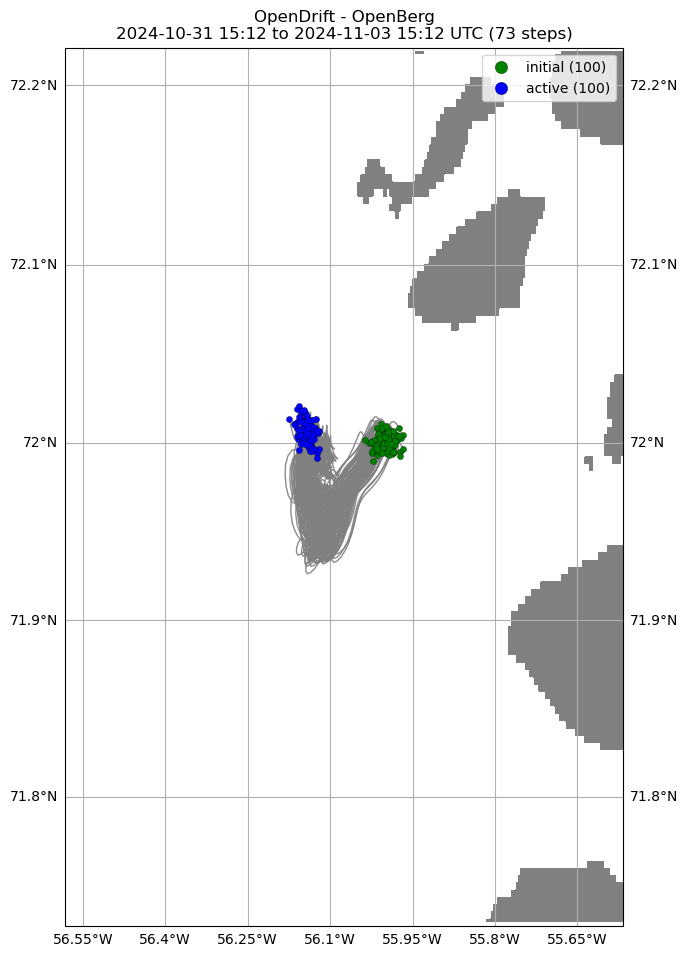

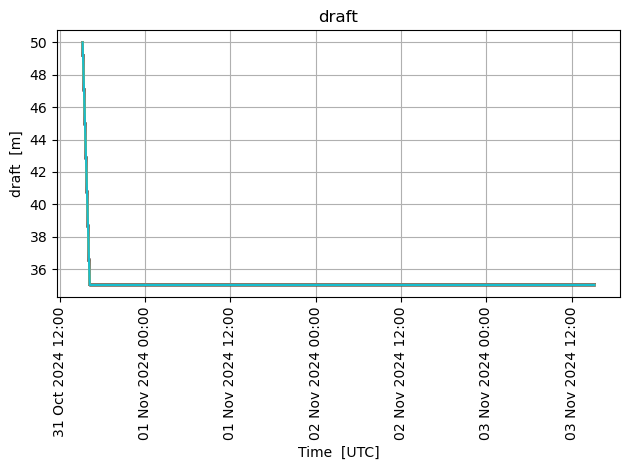

In [6]:
o.plot(fast=True)
o.plot_property('draft')